# ĐỀ TÀI PHÁT HIỆN LÀN ĐƯỜNG BẰNG OPENCV

| Họ Và Tên            | Mã Số Sinh Viên |
|-----------------------|-----------------|
| Đào Phan Gia Huy     | 21085241        |
| Phạm Thanh Lịch      | 21062441        |
| Bùi Thị Huyền Trang | 20122031        |


### Giới thiệu
Dự án phát hiện làn đường ứng dụng xử lý ảnh bằng Python là một ví dụ điển hình về ứng dụng của trí tuệ nhân tạo trong lĩnh vực xe tự hành và an toàn giao thông. Dự án này tập trung vào việc phát hiện và theo dõi làn đường trên các hình ảnh hoặc video được ghi lại từ xe hơi hoặc camera giao thông.

Dự án sử dụng các kỹ thuật xử lý ảnh như chuyển đổi sang ảnh đen trắng (grayscale), làm mờ ảnh (Gaussian blur), phát hiện biên (Canny edge detection) và phát hiện đường thẳng bằng biểu đồ Hough. Khi đã xác định được vị trí của làn đường, dự án sẽ vẽ các đường lái trên hình ảnh để giúp lái xe tự động duy trì trong làn đường và tránh va chạm.

Việc ứng dụng xử lý ảnh bằng Python trong dự án này không chỉ mang lại tính năng tự động lái xe mà còn cải thiện đáng kể an toàn giao thông bằng cách cảnh báo tài xế về sự đảo chiều, việc thất lạc làn đường hoặc các tình huống nguy hiểm khác.

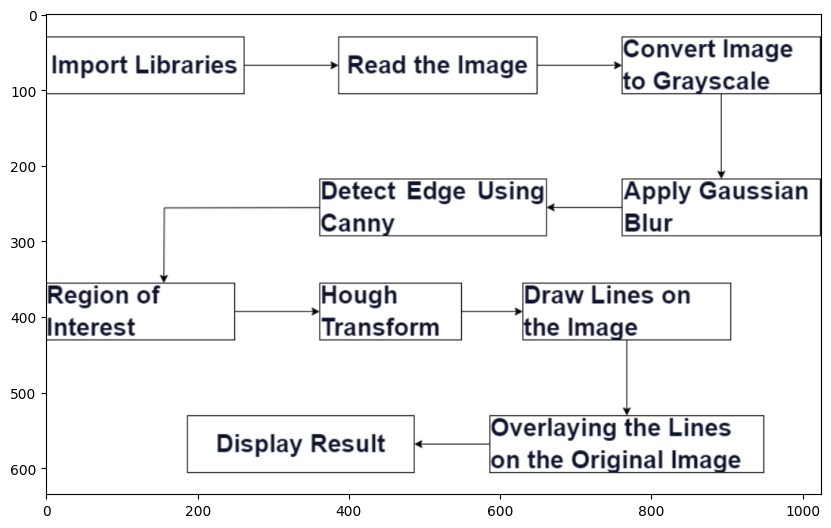

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Kích thước mới cho ảnh (ví dụ: 10x8 inch)
new_width = 10
new_height = 8

# Tạo một hình vẽ với kích thước mới
plt.figure(figsize=(new_width, new_height))

# Load an image (thay bằng hình ảnh của bạn)
image = cv2.imread('dexuat.png')

# Hiển thị ảnh
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Chuyển đổi màu nếu cần
plt.show()

Sơ đồ các bước.

1. Import Libraries (Nhập thư viện):
Bước này bắt đầu bằng việc nhập các thư viện và công cụ cần thiết cho quy trình, ví dụ: OpenCV để xử lý hình ảnh và numpy để làm việc với mảng dữ liệu.

2. Read the Image (Đọc Ảnh):
Bạn đọc ảnh đầu vào (thường là ảnh từ camera hoặc video) bằng OpenCV để tiếp tục xử lý.

3. Convert Image to Grayscale (Chuyển ảnh thành ảnh xám):
Chuyển ảnh màu (ảnh RGB) sang ảnh xám (grayscale) để giảm chi phí tính toán và tập trung vào việc phát hiện cạnh.

4. Apply Gaussian Blur (Áp dụng làm mờ Gaussian):
Để giảm nhiễu và làm cho việc phát hiện cạnh dễ dàng hơn, bạn áp dụng làm mờ Gaussian lên ảnh xám.

5. Detect Edge Using Canny (Phát hiện biên bằng Canny):
Sử dụng thuật toán Canny để phát hiện biên trong ảnh, tạo ra ảnh biên (edges) trong đó các cạnh của đối tượng được sáng lên.

6. Region of Interest (Vùng quan tâm):
Bạn xác định một vùng quan tâm (Region of Interest - ROI) trên ảnh. Vùng này thường là khu vực mà bạn mong muốn phát hiện làn đường. Các điểm nằm ngoài ROI sẽ bị loại bỏ khỏi quá trình phát hiện.

7. Hough Transform (Biến đổi Hough):
Áp dụng biến đổi Hough lên ảnh biên để tìm các đường thẳng trong ảnh. Biến đổi Hough giúp chúng ta xác định các đường thẳng trong không gian rho (ρ) và theta (θ).

8. Draw Lines on the Image (Vẽ đường trên ảnh):
Bước này dựa trên kết quả của biến đổi Hough, chúng ta có thể tìm ra các đường thẳng trong ảnh.

9. Overlaying the Lines on the Original Image (Đè các đường lên ảnh gốc):
Sau khi tìm được các đường, chúng ta đè chúng lên ảnh gốc để hiển thị các đường đó trên hình ảnh thực tế.

10. Display Result (Hiển thị kết quả):
Cuối cùng, bạn hiển thị ảnh đã xử lý với các đường làn đã được phát hiện, thường là để theo dõi, kiểm tra hoặc làm video demo của quá trình phát hiện làn đường.

# Code:

## 1. Import thư viện

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2. Đọc hình ảnh
Tiếp theo, chúng ta sẽ đọc hình ảnh mà chúng ta muốn phát hiện làn đường. Chúng ta sẽ sử dụng imread()chức năng của OpenCV để đọc hình ảnh.

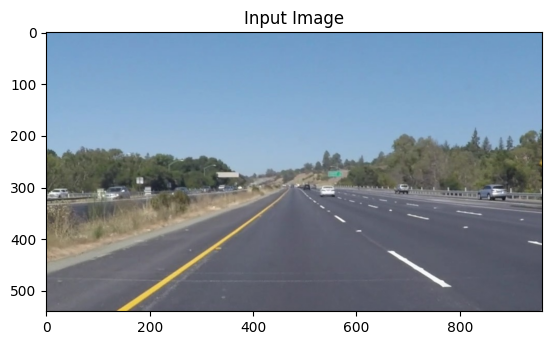

In [3]:
# Đọc ảnh đầu vào
image = cv2.imread('road7.jpg')

# Hiển thị ảnh
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Input Image')
plt.show()

## 3. Chuyển đổi hình ảnh sang thang độ xám
Chúng tôi sẽ chuyển đổi hình ảnh màu sang thang độ xám bằng chức cvtColor()năng của OpenCV.

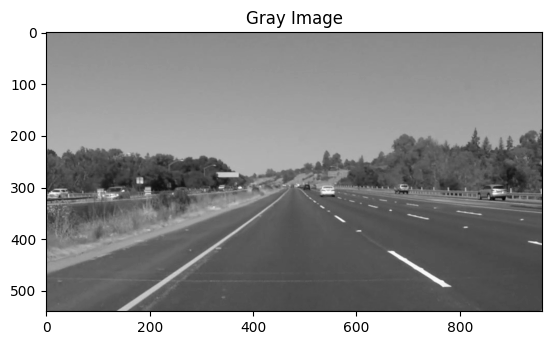

In [4]:
# Chuyển ảnh sang ảnh xám
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#gray: Tên của biến mà sẽ lưu trữ hình ảnh đen trắng sau khi chuyển đổi.
#cvtColor(): Hàm trong thư viện OpenCV được sử dụng để thực hiện việc chuyển đổi màu ảnh.
#image: Biến chứa hình ảnh gốc mà bạn muốn chuyển đổi.
#cv2.COLOR_BGR2GRAY: Hằng số cho biết phương pháp chuyển đổi màu. 
# Trong trường hợp này, cv2.COLOR_BGR2GRAY nghĩa là muốn chuyển đổi hình ảnh màu từ không gian màu BGR (Blue-Green-Red) sang không gian màu xám (gray).

# Hiển thị ảnh xám
plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.show()

## 4. Áp dụng Gaussian Blur
Chúng ta sẽ áp dụng độ mờ Gaussian cho ảnh thang độ xám để giảm nhiễu bằng chức GaussianBlur()năng của OpenCV.

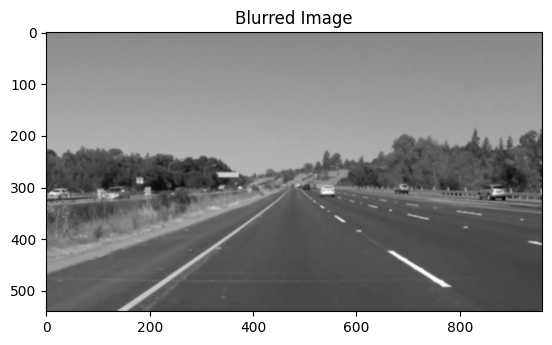

In [5]:
# Áp dụng Gaussian Blur
blur = cv2.GaussianBlur(gray, (5, 5), 0)

#blur: Tên của biến mà sẽ lưu trữ hình ảnh sau khi được làm mờ.
#GaussianBlur(): Hàm trong OpenCV để thực hiện làm mờ Gaussian, một phép làm mờ sử dụng bộ lọc Gaussian.
#gray: Đây là hình ảnh đen trắng (ảnh xám) đầu vào, từ dòng code trước.
#(5, 5): Kích thước của bộ lọc Gaussian. Trong trường hợp này, bộ lọc sẽ có kích thước 5x5, 
# nghĩa là mỗi điểm ảnh trong hình ảnh mới được tính toán bằng cách lấy trung bình của các điểm ảnh trong một khu vực 5x5 xung quanh nó.
#0: Tham số sigma (σ) trong phép làm mờ Gaussian. Giá trị 0 cho sigma sẽ làm cho hàm tự động tính toán giá trị của sigma dựa trên kích thước của bộ lọc.

# Hiển thị ảnh đã áp dụng Gaussian Blur
plt.imshow(blur, cmap='gray')
plt.title('Blurred Image')
plt.show()

## 5. Phát hiện cạnh bằng Canny
Chúng ta sẽ sử dụng thuật toán phát hiện cạnh Canny để phát hiện các cạnh của vạch kẻ làn đường. Chúng tôi sẽ sử dụng Canny()chức năng của OpenCV cho việc này.

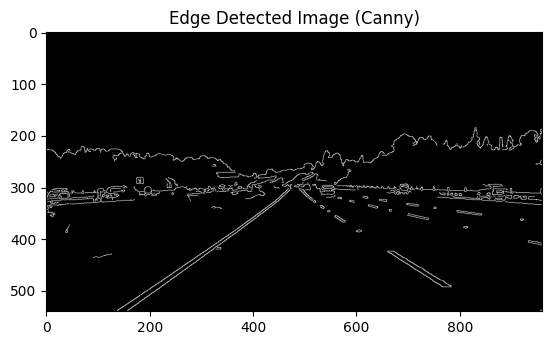

In [6]:
# Sử dụng Canny để phát hiện biên
edges = cv2.Canny(blur, 150, 50)

#edges: Đây là tên của biến mà sẽ lưu trữ kết quả sau khi thực hiện phát hiện biên trên hình ảnh.
#Canny(): Đây là một hàm trong OpenCV để thực hiện phát hiện biên sử dụng phương pháp Canny.
#blur: Đây là hình ảnh đã được làm mờ trước đó, từ dòng code trước.
#150: Đây là ngưỡng trên (high threshold) cho phát hiện biên Canny.
#  Các cạnh có giá trị gradient lớn hơn ngưỡng này sẽ được xem xét là cạnh chắc chắn. 
# Các cạnh có giá trị gradient nhỏ hơn ngưỡng này sẽ bị loại bỏ.
#50: Đây là ngưỡng dưới (low threshold) cho phát hiện biên Canny. Nếu giá trị gradient của một điểm ảnh nằm giữa ngưỡng dưới và ngưỡng trên, 
# thì nó sẽ được xem xét là cạnh nếu nó liên kết với một cạnh chắc chắn.

# Hiển thị ảnh biên đã được phát hiện
plt.imshow(edges, cmap='gray')
plt.title('Edge Detected Image (Canny)')
plt.show()

## 6. Vùng quan tâm
Bây giờ, chúng tôi sẽ xác định vùng quan tâm trong hình ảnh mà chúng tôi mong đợi sẽ có vạch kẻ làn đường. Chúng tôi sẽ che phần còn lại của hình ảnh để chỉ tập trung vào vùng quan tâm. Chúng ta sẽ sử dụng fillPoly()chức năng của OpenCV để tạo mặt nạ và bitwise_and()chức năng áp dụng mặt nạ cho hình ảnh.

Ở đây, mặt nạ khung không có gì khác ngoài một mảng NumPy. Khi chúng ta muốn áp dụng mặt nạ cho một hình ảnh, chúng ta chỉ cần thay đổi giá trị pixel của vùng mong muốn trong hình ảnh đó thành 0 hoặc 255 hoặc bất kỳ số nào khác. Đưa ra dưới đây là một ví dụ về mặt nạ hình ảnh. Giá trị pixel của một vùng nhất định trong ảnh đã được đặt thành 0.

Đây là một phương pháp khá đơn giản nhưng hiệu quả để loại bỏ các vùng và đối tượng không mong muốn khỏi hình ảnh.

In [7]:
# Tạo một mask với cùng kích thước và kiểu dữ liệu như biên edges
mask = np.zeros_like(edges)

Không phải tất cả các cạnh trong ảnh đều hữu ích cho nhiệm vụ xác định làn đường trên đường. Vì các cạnh tương ứng với bầu trời, cây cối, v.v. không liên quan nên chúng cần được loại bỏ. Vùng quan tâm chỉ bao gồm chủ yếu các đường làn. Một hình đa giác đơn giản có thể xác định đây là một hình tam giác có các đỉnh gần như ở góc dưới bên trái, tâm hình ảnh và gần góc dưới cùng bên phải của hình ảnh. Vì vậy, đa giác hình tam giác được cắt ra khỏi ảnh gốc. Tất cả các phần khác trong hình ảnh được loại trừ bằng cách áp dụng mặt nạ bằng cách sử dụng cv2.fillPoly()vàcv2.bitwise_and()

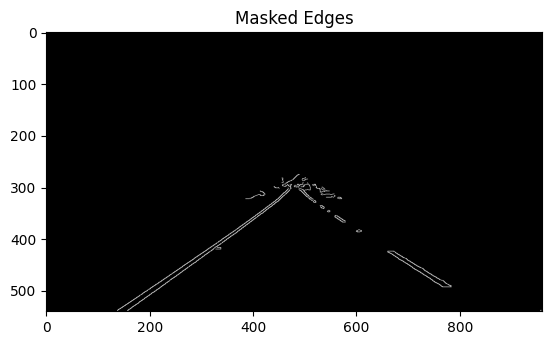

In [8]:
# Định nghĩa các đỉnh của đa giác ROI
height, width = image.shape[:2]
roi_vertices = [(0, height), (width/2, height/2), (width, height)]
mask_color = 255

# Tạo mask
cv2.fillPoly(mask, np.array([roi_vertices], dtype=np.int32), mask_color)

# Áp dụng mask lên edges
masked_edges = cv2.bitwise_and(edges, mask)

# Hiển thị ảnh sau khi áp dụng mask
plt.imshow(masked_edges, cmap='gray')
plt.title('Masked Edges')
plt.show()

### Cách hoạt động:
- Đầu tiên, tạo một mask (mặt nạ) có cùng kích thước và kiểu dữ liệu như biên 
đã được phát hiện bằng Canny (edges).Mask này ban đầu hoàn toàn đen (giá trị bằng 0).

- Xác định các đỉnh của một đa giác (ROI) trên mask. Đa giác này thường được xác định bằng 
cách sử dụng tọa độ của các đỉnh dựa trên vị trí của làn đường trong hình ảnh. 
Đa giác này định nghĩa vùng quan tâm của bạn.

- Gán màu trắng (giá trị bằng 255) vào vùng nằm trong đa giác trên mask, sử dụng hàm cv2.fillPoly(). 
Điều này tạo ra một mask với vùng quan tâm (ROI) ở màu trắng, trong khi phần còn lại vẫn đen (0).

- Sau đó, bạn sử dụng cv2.bitwise_and() để áp dụng mask này lên biên đã phát hiện (edges). 
Hàm này chỉ giữ lại các giá trị (cạnh) ở những vị trí mà mask có giá trị khác 0 (màu trắng) và loại bỏ các giá trị khác (màu đen).

- Kết quả là ảnh "masked_edges," trong đó chỉ giữ lại các cạnh nằm trong vùng quan tâm (ROI). 
Bất kỳ cạnh nào nằm ngoài vùng này đều bị loại bỏ. 
Điều này giúp giảm nhiễu và tập trung vào việc phát hiện làn đường một cách chính xác hơn.

Bước này chỉ tính đến khu vực có làn đường bao phủ. Ở đây, một mặt nạ có cùng kích thước với hình ảnh con đường của chúng ta được tạo ra. Hơn nữa, thao tác bitwise AND được thực hiện giữa mỗi pixel của hình ảnh canny của chúng tôi và mặt nạ này. Cuối cùng, nó che đi hình ảnh khó hiểu và hiển thị vùng quan tâm được vạch ra bởi đường viền đa giác của mặt nạ.

## 7. Biến đổi Hough
Chúng ta sẽ sử dụng phép biến đổi Hough để phát hiện các đường trong ảnh bị che. Chúng tôi sẽ sử dụng HoughLinesP()chức năng của OpenCV cho việc này. Hàm trả về một danh sách các dòng, trong đó mỗi dòng được biểu thị bằng các điểm cuối của nó.
Tham số rho chỉ định độ phân giải khoảng cách của bộ tích lũy Hough tính bằng pixel. thetatham số chỉ định độ phân giải góc của bộ tích lũy Hough tính bằng radian.
Tham số thresholdchỉ định số lượng phiếu bầu (điểm giao) tối thiểu cần thiết để phát hiện một dòng.

● masked_edges: Đây là ảnh đầu vào mà bạn đã tính toán được sau khi áp dụng các bước xử lý trước đó. Đây là ảnh biên (edges) của hình ảnh, thường là kết quả sau khi sử dụng phát hiện biên như Canny để xác định các cạnh trong hình ảnh.

● rho: Đây là độ phân giải (resolution) trong không gian rho (ρ) của biểu đồ Hough. Điều này định cách các đường thẳng sẽ được biểu diễn trong không gian tham số rho (ρ) và theta (θ). Giá trị thường được đặt là 1.

● theta: Đây là độ phân giải (resolution) trong không gian theta (θ) của biểu đồ Hough. Theta (θ) biểu thị góc của đường thẳng với trục ngang và được tính bằng radian. Giá trị thường được đặt là np.pi/60, tức là một góc 1 độ (ví dụ: 1/60 của π radians).

● threshold: Đây là ngưỡng (threshold) cho số lượng điểm biên phải nằm trên một đường thẳng để được coi là một đường thẳng hợp lệ trong không gian Hough. Đường thẳng nào có ít hơn số điểm này sẽ bị loại bỏ. Điều này giúp loại bỏ các đường thẳng ngắn và không mong muốn. Giá trị thường là một số nguyên dương, ví dụ: 120.

● minLineLength: Đây là độ dài tối thiểu của đoạn thẳng để được coi là một đường lái. Các đoạn ngắn hơn sẽ bị loại bỏ. Giá trị này thường là một số nguyên dương, ví dụ: 50.

● maxLineGap: Đây là khoảng cách tối đa giữa hai đoạn thẳng mà vẫn được coi là cùng một đường lái. Nếu khoảng cách giữa hai đoạn thẳng lớn hơn giá trị này, chúng sẽ được xem xét là hai đường lái riêng biệt. Giá trị thường là một số nguyên dương, ví dụ: 10.

Thay đổi các điểm trên để phù hợp với hình ảnh.

In [9]:
lines = cv2.HoughLinesP(masked_edges, rho=6, theta=np.pi/60, threshold=120, minLineLength=50, maxLineGap=10)
# Tìm các đoạn thẳng đã được lọc

## 8. Vẽ các đường trên hình ảnh
Chúng ta sẽ vẽ các đường được phát hiện trên ảnh gốc bằng chức line()năng của OpenCV.

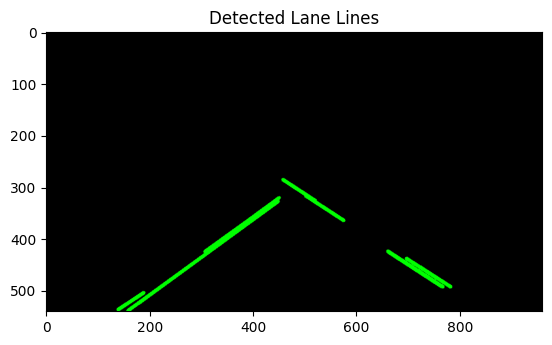

In [10]:
# Tạo ảnh giống với ảnh gốc
line_image = np.zeros_like(image)

# Vẽ các đoạn thẳng lên ảnh
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)
#Lặp qua danh sách các đoạn thẳng tìm thấy trong bước trước và 
# vẽ chúng lên ảnh line_image bằng lệnh cv2.line. Mỗi đoạn thẳng được vẽ bằng một đường màu xanh (0, 255, 0) với độ dày là 5 pixel.

# Hiển thị ảnh với các đoạn thẳng
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Detected Lane Lines')
plt.show()

## 9. Xếp chồng các dòng trên ảnh gốc
Cuối cùng, chúng ta sẽ phủ các dòng được phát hiện lên ảnh gốc bằng chức addWeighted()năng của OpenCV.

In [11]:
final_image = cv2.addWeighted(image, 0.8, line_image, 1, 0)

## 10. Hiển thị kết quả
Chúng ta sẽ sử dụng imshow()hàm Matplotlib để hiển thị kết quả cuối cùng.

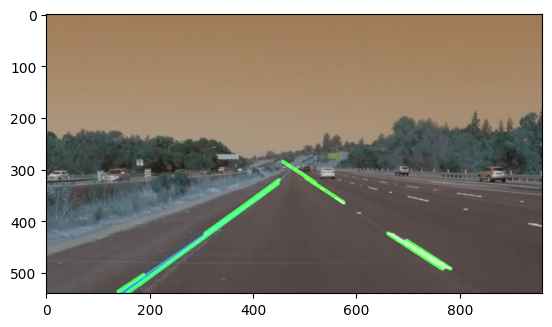

In [12]:
plt.imshow(final_image)
plt.show()